# Ejercicio 3: Evaporador de 2 efectos *backward*

## Enunciado

Un evaporador de dos efectos verticales es utilizado para concentrar un
flujo de una solución de sólidos disueltos al $19~\%$. El flujo entra al
sistema a $80000~\text{L/h}$ con una temperatura de $25~\text{°C}$. Se
quiere alcanzar una concentración de sólidos del $40~\%$. Al entrar, el
flujo pasa por dos intercambiadores de tubo y carcasa a
contra-corrientes $a$ y $b$ que actuan como calentadores. Luego, pasa a
través del segundo y primer efecto como muestra la figura. El vapor que
se utiliza en el calentador $a$ proviene de la linea de vapor entre el
segundo efecto y el condensador $C$. Mientras que para el calentador $b$
se utiliza el vapor proveniente de la linea de vapor entre el primer y
segundo efecto. La diferencia de temperaturas $\Delta T_h$ para ambos
calentadores es de $10~\text{°C}$. Por último, la temperatura de entrada
del vapor saturado de la corriente $\text{S}$ es de $110~\text{°C}$.

<figure>
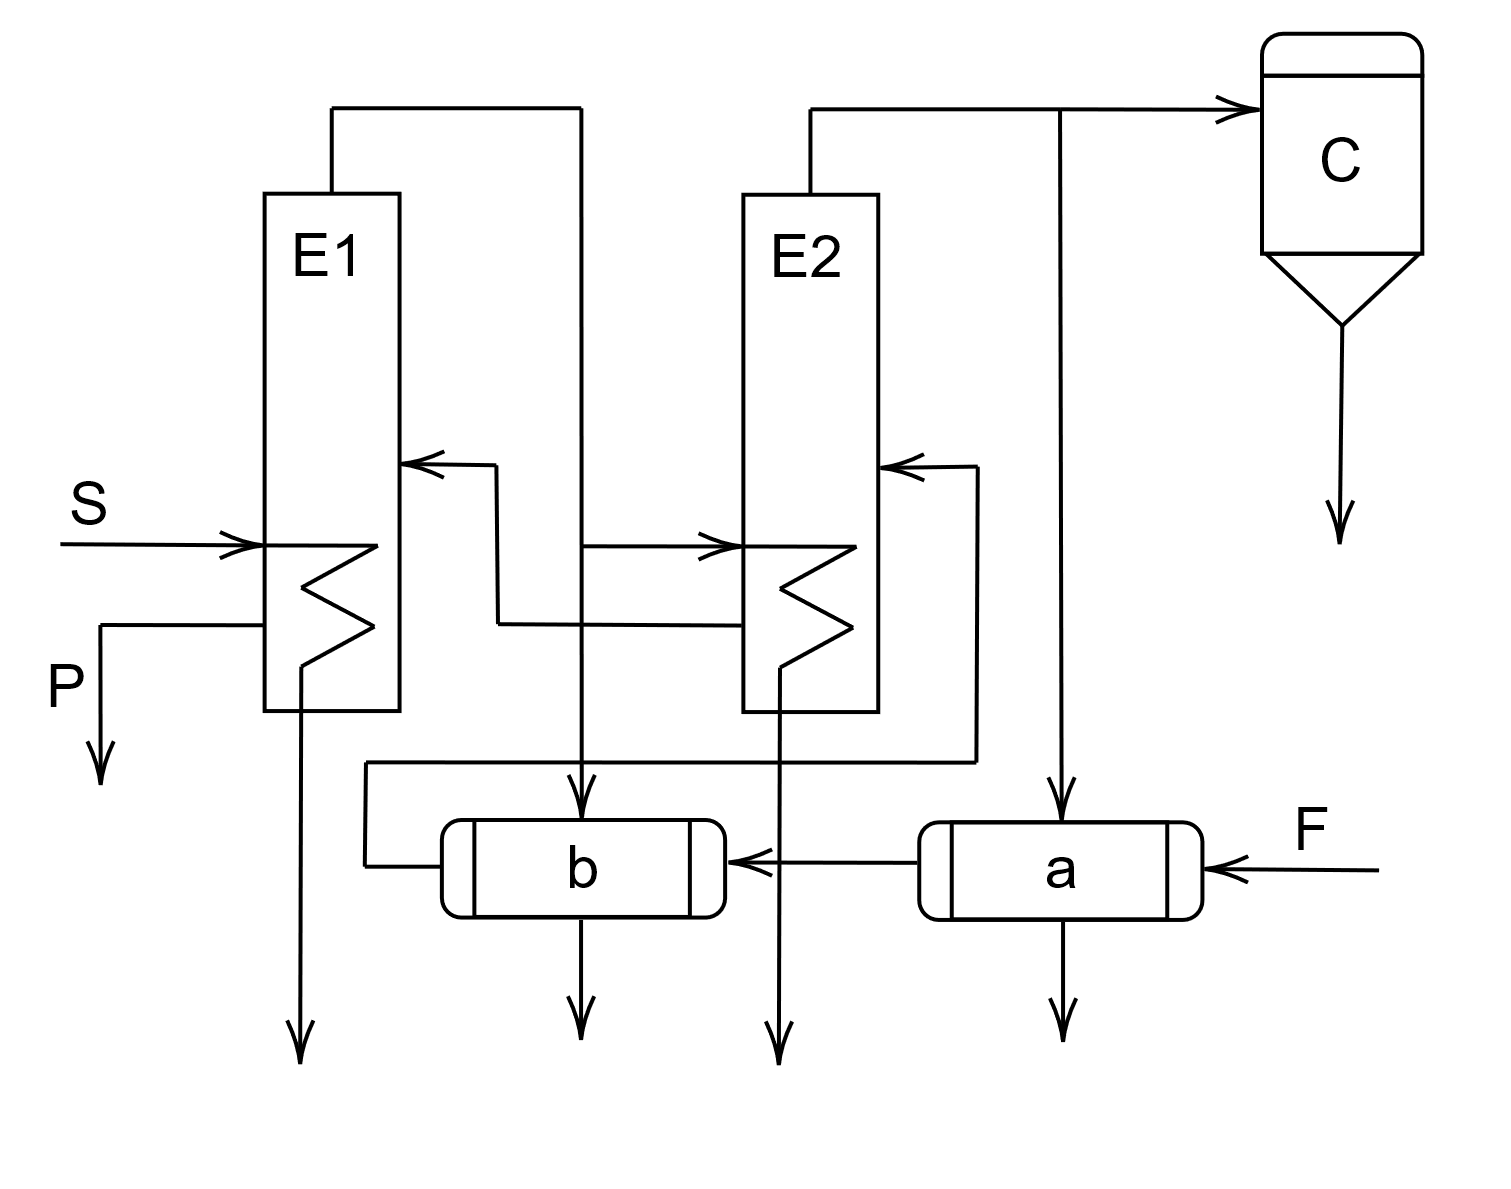
<figcaption aria-hidden="true">S</figcaption>
</figure>

Además, su mejor amigo le asegura que las diferencias de temperatura
para cada intercambiador son $\Delta T_1 = 22~\text{°C}$ y
$\Delta T_2 = 15~\text{°C}$. Para corroborar, le entrega la siguiente
información.

-   La gravedad específica para sólidos disueltos al $19\%$ es $1.0632$
    y la densidad del agua es $0.995~\text{kg/L}$.
-   Las elevaciones del punto de ebullición (EPE) son $7~\text{°C}$ y
    $4~\text{°C}$ para el primer y segundo efecto respectivamente.
-   Los coeficientes de transferencia global de calor corregidos son
    $25555.12~\text{W/m}^2\cdot\text{K}$ para $\text{E}1$ y
    $39974.8~\text{W/m}^2\cdot\text{K}$ para $\text{E}2$.
-   Considere que el calor latente del vapor será
    $\lambda_{s}=2183~\text{kJ/kg}$, $\lambda_{1}=2341~\text{kJ/kg}$ y
    $\lambda_{2}=2678~\text{kJ/kg}$.
-   La ecuación para el calor específico a presión constante en función
    de la temperatura (en °C) es:

$$c_p (\text{J/kg}\cdot\text{°C}) = 6.5684 T + 3499$$

Encuentre: 1. La fracción másica de sólidos disueltos luego del segundo
efecto. 2. El flujo másico de vapor requerido en la corriente $\text{S}$
en $\text{kg/h}$. 3. El área de transferecia de calor para cada efecto
en $\text{m}^2$. 4. La economía del intercambiador. 5. El calor a ser
removido del condensdor en $\text{MW}$.

## Solución

Mostrar solución

``` python
import handcalcs.render
handcalcs.set_option("custom_symbols",{"dT": "\Delta T", "dEPE": "\Delta EPE", "dotm": "\dot{m", "lambda": "\lambda"})
handcalcs.set_option("latex_block_start", "$$")
handcalcs.set_option("latex_block_end", "$$")
from sympy import *
from sympy.solvers.solveset import linsolve
```

### Inciso 1

``` python
%%render params
w_f = 0.19
w_p = 0.4
rho_w = 0.995 #kg/L
```

$$
\begin{aligned}
w_{f} &= 0.190 \; 
 &w_{p} &= 0.400 \; 
 &\rho_{w} &= 0.995 \; \;\textrm{(kg/L)}
\\[10pt]
\end{aligned}
$$

Asumiendo $1~\text{hora}$ de opración.

``` python
%%render short 2
F = 80000*1.0632*rho_w #kg
P = F*(w_f/w_p) #kg
V = F-P #kg
```

$$
\begin{aligned}
F &= 80000 \cdot 1.0632 \cdot \rho_{w}  = 80000 \cdot 1.0632 \cdot 0.99 &= 84630.72 \; \;\textrm{(kg)}
\\[10pt]
P &= F \cdot \left( \frac{ w_{f} }{ w_{p} } \right)  = 84630.72 \cdot \left( \frac{ 0.19 }{ 0.40 } \right) &= 40199.59 \; \;\textrm{(kg)}
\\[10pt]
V &= F - P  = 84630.72 - 40199.59 &= 44431.13 \; \;\textrm{(kg)}
\end{aligned}
$$

Podemos asumir que la evaporación es equitativa en ambos efectos, luego
para el segundo efecto:

$$
w_f\cdot F = w_{E2}\cdot L =  w_{E2}\cdot (F-V_{E2})
$$

``` python
%%render short
V_E2 = V/2 #kg
w_E2 = (w_f*F)/(F-V_E2)
```

$$
\begin{aligned}
V_{E2} &= \frac{ V }{ 2 }  = \frac{ 44431.128 }{ 2 } &= 22215.564 \; \;\textrm{(kg)}
\\[10pt]
w_{E2} &= \frac{ w_{f} \cdot F }{ F - V_{E2} }  = \frac{ 0.190 \cdot 84630.720 }{ 84630.720 - 22215.564 } &= 0.258  
\end{aligned}
$$

### Inciso 2 y 3

Del enunciado sabemos lo siguiente:

``` python
%%render params
dT_1 = 22
dEPE_1 = 7
dT_2 = 15
dEPE_2 = 4
dT_h = 10
lambda_s = 2183e3 #J/kg
lambda_1 = 2341e3 #J/kg
lambda_2 = 2678e3 #J/kg
```

$$
\begin{aligned}
\Delta T_{1} &= 22 \; 
 &\Delta EPE_{1} &= 7 \; 
 &\Delta T_{2} &= 15 \; 
\\[10pt]
 \Delta EPE_{2} &= 4 \; 
 &\Delta T_{h} &= 10 \; 
 &\lambda_{s} &= 2183000.000 \; \;\textrm{(J/kg)}
\\[10pt]
 \lambda_{1} &= 2341000.000 \; \;\textrm{(J/kg)}
 &\lambda_{2} &= 2678000.000 \; \;\textrm{(J/kg)}
\end{aligned}
$$

Además definiremos una función que calcule el calor específico promedio
entre dos temperaturas.

``` python
def c_p(T_1,T_2):
    c_p1 = 6.5684*T_1+3499
    c_p2 = 6.5684*T_2+3499
    return (c_p1+c_p2)/2
```

A partir del enunciado podemos despejar las tempraturas de los flujos.

``` python
%%render short
## Temperaturas en $^\circ$C
T_s = 110 #Vapor que entra a E1
T_1 = T_s-dT_1 #Líquido en E1 o producto
T_s2 = T_1-dEPE_1 #Vapor hacia E2
T_2 = T_s2-dT_2 #Líquido en E2
T_c = T_2-dEPE_2 #Vapor hacia el condensador
T_b = T_s2-dT_h #Líquido que entra a E2 después de b
T_a = T_c-dT_h #líquido que entra a b después de a
T_F = 25 #Líquido que entra a a
```

$$
\begin{aligned}
& \textrm{ Temperaturas en $^\circ$C}\\[10pt]
T_{s} &= 110 \; \;\textrm{(Vapor que entra a E1)}
\\[10pt]
T_{1} &= T_{s} - \Delta T_{1}  = 110 - 22 &= 88 \; \;\textrm{(Líquido en E1 o producto)}
\\[10pt]
T_{s2} &= T_{1} - \Delta EPE_{1}  = 88 - 7 &= 81 \; \;\textrm{(Vapor hacia E2)}
\\[10pt]
T_{2} &= T_{s2} - \Delta T_{2}  = 81 - 15 &= 66 \; \;\textrm{(Líquido en E2)}
\\[10pt]
T_{c} &= T_{2} - \Delta EPE_{2}  = 66 - 4 &= 62 \; \;\textrm{(Vapor hacia el condensador)}
\\[10pt]
T_{b} &= T_{s2} - \Delta T_{h}  = 81 - 10 &= 71 \; \;\textrm{(Líquido que entra a E2 después de b)}
\\[10pt]
T_{a} &= T_{c} - \Delta T_{h}  = 62 - 10 &= 52 \; \;\textrm{(líquido que entra a b después de a)}
\\[10pt]
T_{F} &= 25 \; \;\textrm{(Líquido que entra a a)}
\end{aligned}
$$

Los balances de calor entonces serán:

``` python
m_1 = P
m_F = F
m_s, m_2 = symbols('\dot{m}_s, \dot{m}_2')
```

Para el primer efecto.

$$
\dot{m}_s\lambda_s = (\dot{m}_2-\dot{m}_1)\lambda_1 + \dot{m}_2\left(\frac{c_p(T_1)\cdot c_p(T_2)}{2}\right)\left(T_1-T_2\right)
$$

``` python
E1 = Eq(m_s*lambda_s, (m_2-m_1)*lambda_1+m_2*c_p(T_1,T_2)*(T_1-T_2))
E1
```

$\displaystyle 2183000.0 \dot{m}_s = 2429104.8696 \dot{m}_2 - 94107244872.0$

Para el segundo efecto más el calentador $b$.

$$
(\dot{m}_2-\dot{m}_1)\lambda_1 = (\dot{m}_F-\dot{m}_2)\lambda_2 + \dot{m}_F\left(\frac{c_p(T_2)\cdot c_p(T_b)}{2}\right)\left(T_2-T_b\right) + \dot{m}_F\left(\frac{c_p(T_b)\cdot c_p(T_a)}{2}\right)\left(T_b-T_a\right)
$$

``` python
E2 = Eq((m_2-m_1)*lambda_1, (m_F-m_2)*lambda_2 + m_F*c_p(T_2,T_b)*(T_2-T_b)+ m_F*c_p(T_b,T_a)*(T_b-T_a))
E2
```

$\displaystyle 2341000.0 \dot{m}_2 - 94107244872.0 = 231245952445.871 - 2678000.0 \dot{m}_2$

``` python
sol = linsolve((E1,E2), (m_s, m_2))
for sol1, sol2 in sol:
    dotm_s = sol1
    dotm_2 = sol2
```

Luego de resolver el sistema de ecuaciones llegamos a los siguientes
flujos.

``` python
%%render 0
dotm_s = dotm_s #kg/h
dotm_1 = m_1 #kg/h
dotm_2 = dotm_2 #kg/h
dotm_F = m_F #kg/h
```

$$
\begin{aligned}
\dot{m_{s}} &= 29023.0 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{1}} &= 40200 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{2}} &= 64824.0 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{F}} &= 84631 \; \;\textrm{(kg/h)}
\end{aligned}
$$

A partir de esta información podemos depejar la áreas en función de la
ecuación característica.

$$
q = UA\Delta T
$$

``` python
%%render long
U_1 = 25555.12 #W/m$^2\cdot$K
U_2 = 39974.8 #W/m$^2\cdot$K
q_1 = (dotm_s/3600)*lambda_s #W
A_1 = q_1/(U_1*dT_1) #m$^2$
q_b = (dotm_F/3600)*c_p(T_b,T_a)*(T_b-T_a) #W
q_2 = ((dotm_2-dotm_1)/3600)*lambda_2 - q_b #W
A_2 = q_2/(U_2*dT_2) #m$^2$
```

$$
\begin{aligned}
U_{1} &= 25555.120 \; \;\textrm{(W/m$^2\cdot$K)}
\\[10pt]
U_{2} &= 39974.800 \; \;\textrm{(W/m$^2\cdot$K)}
\\[10pt]
q_{1} &= \left( \frac{ \dot{m_{s}} }{ 3600 } \right) \cdot \lambda_{s} \\&= \left( \frac{ 29023.269 }{ 3600 } \right) \cdot 2183000.000 \\&= 17599387.546 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
A_{1} &= \frac{ q_{1} }{ U_{1} \cdot \Delta T_{1} } \\&= \frac{ 17599387.546 }{ 25555.120 \cdot 22 } \\&= 31.304 \; \;\textrm{(m$^2$)}\\[10pt]
\\[10pt]
q_{b} &= \left( \frac{ \dot{m_{F}} }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( T_{b} ,\  T_{a} \right) \cdot \left( T_{b} - T_{a} \right) \\&= \left( \frac{ 84630.720 }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( 71 ,\  52 \right) \cdot \left( 71 - 52 \right) \\&= 1743302.921 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
q_{2} &= \left( \frac{ \dot{m_{2}} - \dot{m_{1}} }{ 3600 } \right) \cdot \lambda_{2} - q_{b} \\&= \left( \frac{ 64824.307 - 40199.592 }{ 3600 } \right) \cdot 2678000.000 - 1743302.921 \\&= 16574749.031 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
A_{2} &= \frac{ q_{2} }{ U_{2} \cdot \Delta T_{2} } \\&= \frac{ 16574749.031 }{ 39974.800 \cdot 15 } \\&= 27.642 \; \;\textrm{(m$^2$)}\\[10pt]
\end{aligned}
$$

Se debe cumplir que $A_1 = A_2$, por lo tanto los $\Delta T_1$ y
$\Delta T_2$ no son los correspondientes a los efectos. Se debe hacer
una corrección a las temperaturas.

``` python
%%render
A_prom = (A_1+A_2)/2
dT_c1 = dT_1 * (A_1/A_prom)
dT_c2 = dT_2 * (A_2/A_prom)
```

$$
\begin{aligned}
A_{prom} &= \frac{ A_{1} + A_{2} }{ 2 }  = \frac{ 31.304 + 27.642 }{ 2 } &= 29.473  
\\[10pt]
\Delta T_{c1} &= \Delta T_{1} \cdot \left( \frac{ A_{1} }{ A_{prom} } \right)  = 22 \cdot \left( \frac{ 31.304 }{ 29.473 } \right) &= 23.367  
\\[10pt]
\Delta T_{c2} &= \Delta T_{2} \cdot \left( \frac{ A_{2} }{ A_{prom} } \right)  = 15 \cdot \left( \frac{ 27.642 }{ 29.473 } \right) &= 14.068  
\end{aligned}
$$

Con estas nuevas diferencias de temperaturas iteramos.

``` python
%%render short
## Temperaturas en $^\circ$C
T_s = 110 #Vapor que entra a E1
T_1 = T_s-dT_c1 #Líquido en E1 o producto
T_s2 = T_1-dEPE_1 #Vapor hacia E2
T_2 = T_s2-dT_c2 #Líquido en E2
T_c = T_2-dEPE_2 #Vapor hacia el condensador
T_b = T_s2-dT_h #Líquido que entra a E2 después de b
T_a = T_c-dT_h #líquido que entra a b después de a
T_F = 25 #Líquido que entra a a
```

$$
\begin{aligned}
& \textrm{ Temperaturas en $^\circ$C}\\[10pt]
T_{s} &= 110 \; \;\textrm{(Vapor que entra a E1)}
\\[10pt]
T_{1} &= T_{s} - \Delta T_{c1}  = 110 - 23.367 &= 86.633 \; \;\textrm{(Líquido en E1 o producto)}
\\[10pt]
T_{s2} &= T_{1} - \Delta EPE_{1}  = 86.633 - 7 &= 79.633 \; \;\textrm{(Vapor hacia E2)}
\\[10pt]
T_{2} &= T_{s2} - \Delta T_{c2}  = 79.633 - 14.068 &= 65.565 \; \;\textrm{(Líquido en E2)}
\\[10pt]
T_{c} &= T_{2} - \Delta EPE_{2}  = 65.565 - 4 &= 61.565 \; \;\textrm{(Vapor hacia el condensador)}
\\[10pt]
T_{b} &= T_{s2} - \Delta T_{h}  = 79.633 - 10 &= 69.633 \; \;\textrm{(Líquido que entra a E2 después de b)}
\\[10pt]
T_{a} &= T_{c} - \Delta T_{h}  = 61.565 - 10 &= 51.565 \; \;\textrm{(líquido que entra a b después de a)}
\\[10pt]
T_{F} &= 25 \; \;\textrm{(Líquido que entra a a)}
\end{aligned}
$$

El sistema de ecuaciones es el mismo, pero ahora cambian las
temperaturas.

``` python
m_1 = P
m_F = F
m_s, m_2 = symbols('\dot{m}_s, \dot{m}_2')
E1 = Eq(m_s*lambda_s, (m_2-m_1)*lambda_1+m_2*c_p(T_1,T_2)*(T_1-T_2))
E1
```

$\displaystyle 2183000.0 \dot{m}_s = 2425248.49178518 \dot{m}_2 - 94107244872.0$

``` python
E2 = Eq((m_2-m_1)*lambda_1, (m_F-m_2)*lambda_2 + m_F*c_p(T_2,T_b)*(T_2-T_b)+ m_F*c_p(T_b,T_a)*(T_b-T_a))
E2
```

$\displaystyle 2341000.0 \dot{m}_2 - 94107244872.0 = 231242568253.435 - 2678000.0 \dot{m}_2$

``` python
sol = linsolve((E1,E2), (m_s, m_2))
for sol1, sol2 in sol:
    dotm_s = sol1
    dotm_2 = sol2
```

Los nuevos flujos serán:

``` python
%%render 2
dotm_s = dotm_s #kg/h
dotm_1 = m_1 #kg/h
dotm_2 = dotm_2 #kg/h
dotm_F = m_F #kg/h
```

$$
\begin{aligned}
\dot{m_{s}} &= 28908.0 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{1}} &= 40199.59 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{2}} &= 64823.63 \; \;\textrm{(kg/h)}
\\[10pt]
\dot{m_{F}} &= 84630.72 \; \;\textrm{(kg/h)}
\end{aligned}
$$

Por último comprobamos que las áreas sean las mismas.

``` python
%%render long 1
U_1 = 25555.12 #W/m$^2\cdot$K
U_2 = 39974.8 #W/m$^2\cdot$K
q_1 = (dotm_s/3600)*lambda_s #W
A_1 = q_1/(U_1*dT_c1) #m$^2$
q_b = (dotm_F/3600)*c_p(T_b,T_a)*(T_b-T_a) #W
q_2 = ((dotm_2-dotm_1)/3600)*lambda_2 - q_b #W
A_2 = q_2/(U_2*dT_c2) #m$^2$
```

$$
\begin{aligned}
U_{1} &= 25555.1 \; \;\textrm{(W/m$^2\cdot$K)}
\\[10pt]
U_{2} &= 39974.8 \; \;\textrm{(W/m$^2\cdot$K)}
\\[10pt]
q_{1} &= \left( \frac{ \dot{m_{s}} }{ 3600 } \right) \cdot \lambda_{s} \\&= \left( \frac{ 28908.0 }{ 3600 } \right) \cdot 2183000.0 \\&= 17529492.5 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
A_{1} &= \frac{ q_{1} }{ U_{1} \cdot \Delta T_{c1} } \\&= \frac{ 17529492.5 }{ 25555.1 \cdot 23.4 } \\&= 29.4 \; \;\textrm{(m$^2$)}\\[10pt]
\\[10pt]
q_{b} &= \left( \frac{ \dot{m_{F}} }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( T_{b} ,\  T_{a} \right) \cdot \left( T_{b} - T_{a} \right) \\&= \left( \frac{ 84630.7 }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( 69.6 ,\  51.6 \right) \cdot \left( 69.6 - 51.6 \right) \\&= 1655292.6 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
q_{2} &= \left( \frac{ \dot{m_{2}} - \dot{m_{1}} }{ 3600 } \right) \cdot \lambda_{2} - q_{b} \\&= \left( \frac{ 64823.6 - 40199.6 }{ 3600 } \right) \cdot 2678000.0 - 1655292.6 \\&= 16662257.7 \; \;\textrm{(W)}\\[10pt]
\\[10pt]
A_{2} &= \frac{ q_{2} }{ U_{2} \cdot \Delta T_{c2} } \\&= \frac{ 16662257.7 }{ 39974.8 \cdot 14.1 } \\&= 29.6 \; \;\textrm{(m$^2$)}\\[10pt]
\end{aligned}
$$

Las áreas son lo suficientemente parecidas. Por lo que podemos asumir
que el área de los efectos será un promedio entre ambas.

``` python
%%render 1
A_prom = (A_1+A_2)/2
```

$$
\begin{aligned}
A_{prom} &= \frac{ A_{1} + A_{2} }{ 2 }  = \frac{ 29.4 + 29.6 }{ 2 } &= 29.5  
\end{aligned}
$$

El flujo de vapor en la corriente $\text{S}$ será $28908~\text{kg/h}$.
El área de los efectos será $29.5~\text{m}^2$.

### Inciso 4

La economía del sistema completo viene dado por la división entre la
cantidad evaporada $\text{V}$ calculada en el inciso 1 y el flujo de
vapor $\text{S}$.

``` python
%%render 2
E = V/dotm_s #kg/kg
```

$$
\begin{aligned}
E &= \frac{ V }{ \dot{m_{s}} }  = \frac{ 44431.13 }{ 28908.0 } &= 1.54 \; \;\textrm{(kg/kg)}
\end{aligned}
$$

### Inciso 5

El calor removido en el condensador final será.

$$
q_C = \left(\dot{m}_F-\dot{m}_2\right)\lambda_2 - \dot{m}_F\left(\frac{c_p(T_a)\cdot c_p(T_F)}{2}\right)\left(T_a-T_F\right)
$$

``` python
%%render long
q_C = ((dotm_F - dotm_2)/3600)*lambda_2 - (dotm_F/3600)*c_p(T_a,T_F)*(T_a-T_F) #W
```

$$
\begin{aligned}
q_{C} &= \left( \frac{ \dot{m_{F}} - \dot{m_{2}} }{ 3600 } \right) \cdot \lambda_{2} - \left( \frac{ \dot{m_{F}} }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( T_{a} ,\  T_{F} \right) \cdot \left( T_{a} - T_{F} \right) \\&= \left( \frac{ 84630.720 - 64823.633 }{ 3600 } \right) \cdot 2678000.000 - \left( \frac{ 84630.720 }{ 3600 } \right) \cdot \operatorname{c_{p}} \left( 51.565 ,\  25 \right) \cdot \left( 51.565 - 25 \right) \\&= 12392083.821 \; \;\textrm{(W)}\\[10pt]
\end{aligned}
$$

``` python
%%render params 1
R = q_C/10**6 #MW
```

$$
\begin{aligned}
R &= 12.4 \; \;\textrm{(MW)}
\end{aligned}
$$